In [1]:
import re

# 숫자 제거

p = re.compile("[0-9]+")
result = p.sub("", "올해 들어 서울 지역의 부동산 가격이 30% 이상 하락했습니다")
print(result)

올해 들어 서울 지역의 부동산 가격이 % 이상 하락했습니다


In [2]:
# 숫자와 특수문자 제거

def clean_text(input_data):
    p = re.compile("[0-9_!@#$%^&*]")
    result = p.sub("",input_data)
    return result

txt = "올해 들어 서울 지역의 부동산 가격이 30% 이상 하락했습니다##$#@%"
print(txt)
print(clean_text(txt))

올해 들어 서울 지역의 부동산 가격이 30% 이상 하락했습니다##$#@%
올해 들어 서울 지역의 부동산 가격이  이상 하락했습니다


In [3]:
# 불용어 처리 : 빈번하게 나타나지만 구체적인 의미를 찾기 어려운 단어들
# the, a, an 같은 경우... 그런데 한국어는 NLTK 패키지에서 따로 불용어 패키지를 제공하지 않음

In [4]:
# 불용어 사전 다운로드

import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /Users/ian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords

words = ["chief", "justice", "roberts", "president", "carter", "president", "clinton", "president", "bush", "president", "obama", "fellow", "americans", "and", "people", "of", "the", "world", "thank", "you"]
print([w for w in words if not w in stopwords.words("english")])

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank']


In [6]:
# 문장부호 tokenizer 다운로드
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ian/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

stm = PorterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook cooker cook cook cookeri 

In [8]:
stm = PorterStemmer()
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [9]:
# Porter보다 조금 더 성능이 좋은 Lancaster

from nltk.stem.lancaster import LancasterStemmer

stm = LancasterStemmer()
txt = "cook cooker cooking cooks cookery"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

cook cook cook cook cookery 

In [10]:
stm = LancasterStemmer()
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

python python python python python 

In [11]:
# Porter나 Lancaster가 처리하지 못한 경우에는 RegexpStemmer를 사용하여 특정 표현식을 일괄 삭제함

from nltk.stem.regexp import RegexpStemmer

stm = RegexpStemmer('ing')
print(stm.stem('cooking'))
print(stm.stem('cookery'))
print(stm.stem('ingleside'))

cook
cookery
leside


In [12]:
stm = RegexpStemmer('python')
txt = "pythoning pythons Python pythoners pythoned"
words = word_tokenize(txt)
for w in words:
    print(stm.stem(w),end=" ")

ing s Python ers ed 

In [13]:
# N-gram : n번 연이어 등장하는 단어들의 연쇄

txt = "Hello"
for i in range(len(txt) - 1):
    print(txt[i], txt[i+1], sep='')

He
el
ll
lo


In [14]:
txt = "this is python script"
words = txt.split()
for i in range(len(words) - 1):
    print(words[i], words[i+1])

this is
is python
python script


In [15]:
txt = "hello"

two_gram = zip(txt, txt[1:])
for i in two_gram:
    print(i[0],i[1],sep='')

he
el
ll
lo


In [16]:
txt = "this is python script"
words = txt.split()
list(zip(words, words[1:]))

[('this', 'is'), ('is', 'python'), ('python', 'script')]

In [17]:
from nltk import ngrams

# N-gram 함수. split(),2 하면 바이그램. split(),3 하면 트라이그램
sentence = "I love you. Good morning. Good bye."
grams = ngrams(sentence.split(),2)
for gram in grams:
    print(gram,end=" ")

('I', 'love') ('love', 'you.') ('you.', 'Good') ('Good', 'morning.') ('morning.', 'Good') ('Good', 'bye.') 

In [18]:
# 한국어 처리

In [19]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [20]:
# 헌법 말뭉치

c = kolaw.open('constitution.txt').read()
print(c[:40])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로


In [21]:
# 국회의안 말뭉치

from konlpy.corpus import kobill
print(kobill.fileids())

d = kobill.open('1809890.txt').read()
print(d[:40])

['1809896.txt', '1809897.txt', '1809895.txt', '1809894.txt', '1809890.txt', '1809891.txt', '1809893.txt', '1809892.txt', '1809899.txt', '1809898.txt']
지방공무원법 일부개정법률안

(정의화의원 대표발의 )

 의 안
 번 호


In [22]:
from konlpy.tag import Hannanum
han = Hannanum()

txt = """이 안의 내용은 뉴스에서 가져와도 좋고 아무 내용이나 좋으니까요.
저는 그냥 pdf 파일에 있는 녀석을 그대로 쓰겠습니다.
원/달러 환율이 3년 5개월만에 최고치로 마감하고, 위안화 환율이 11년만에 달러당 7위안을 넘었다.
원/엔 재정환율 역시 100엔당 30원 가까이 뛰었다. 품사 분석을 위해서 [이 텍스트]를 쓰고 있다."""

print(han.morphs(txt)) # 형태소 분석

['이', '안', '의', '내용', '은', '뉴스', '에서', '가', '아', '지', '어', '오', '아', '좋', '고', '아무', '내용', '이나', '좋', '으니까', '요', '.', '저', '는', '그냥', 'pdf', '파일', '에', '있', '는', '녀석', '을', '그대로', '쓰', '겠습니다', '.', '원', '/', '달러', '환율', '이', '3년', '5개월', '만에', '최고치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만에', '달러당', '7위', '안', '을', '넘', '었다', '.', '원', '/', '엔', '재정환율', '역시', '100엔', '당', '30원', '가까이', '뛰', '었다', '.', '품사', '분석', '을', '위하', '어서', '[', '이', '텍스트', ']', '를', '쓰', '고', '있', '다', '.']


In [23]:
print(han.nouns(txt)) # 명사 추출

['안', '내용', '뉴스', '내용', '저', '파일', '녀석', '원', '달러', '환율', '3년', '5개월', '최고치', '마감', '위안화', '환율', '11년', '달러당', '7위', '원', '엔', '재정환율', '100엔', '30원', '품사', '분석', '텍스트']


In [24]:
print(han.pos(txt)) # 형태소와 품사

[('이', 'M'), ('안', 'N'), ('의', 'J'), ('내용', 'N'), ('은', 'J'), ('뉴스', 'N'), ('에서', 'J'), ('가', 'P'), ('아', 'E'), ('지', 'P'), ('어', 'E'), ('오', 'P'), ('아', 'E'), ('좋', 'P'), ('고', 'E'), ('아무', 'M'), ('내용', 'N'), ('이나', 'J'), ('좋', 'P'), ('으니까', 'E'), ('요', 'J'), ('.', 'S'), ('저', 'N'), ('는', 'J'), ('그냥', 'M'), ('pdf', 'F'), ('파일', 'N'), ('에', 'J'), ('있', 'P'), ('는', 'E'), ('녀석', 'N'), ('을', 'J'), ('그대로', 'M'), ('쓰', 'P'), ('겠습니다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('달러', 'N'), ('환율', 'N'), ('이', 'J'), ('3년', 'N'), ('5개월', 'N'), ('만에', 'J'), ('최고치', 'N'), ('로', 'J'), ('마감', 'N'), ('하고', 'J'), (',', 'S'), ('위안화', 'N'), ('환율', 'N'), ('이', 'J'), ('11년', 'N'), ('만에', 'J'), ('달러당', 'N'), ('7위', 'N'), ('안', 'X'), ('을', 'J'), ('넘', 'P'), ('었다', 'E'), ('.', 'S'), ('원', 'N'), ('/', 'S'), ('엔', 'N'), ('재정환율', 'N'), ('역시', 'M'), ('100엔', 'N'), ('당', 'X'), ('30원', 'N'), ('가까이', 'M'), ('뛰', 'P'), ('었다', 'E'), ('.', 'S'), ('품사', 'N'), ('분석', 'N'), ('을', 'J'), ('위하', 'P'), ('어서', 'E'), ('[', 'S'

In [25]:
print(han.tagset) # 품사 목록

{'E': '어미', 'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ET': '전성 어미', 'F': '외국어', 'I': '독립언', 'II': '감탄사', 'J': '관계언', 'JC': '격조사', 'JP': '서술격 조사', 'JX': '보조사', 'M': '수식언', 'MA': '부사', 'MM': '관형사', 'N': '체언', 'NB': '의존명사', 'NC': '보통명사', 'NN': '수사', 'NP': '대명사', 'NQ': '고유명사', 'P': '용언', 'PA': '형용사', 'PV': '동사', 'PX': '보조 용언', 'S': '기호', 'X': '접사', 'XP': '접두사', 'XS': '접미사'}


In [26]:
# 꼬꼬마 패키지

from konlpy.tag import Kkma
kkm = Kkma()
print(kkm.morphs(txt))
print(kkm.nouns(txt))
print(kkm.pos(txt))

['이', '안', '의', '내용', '은', '뉴스', '에서', '가져오', '아도', '좋', '고', '아무', '내용', '이나', '좋', '으니까요', '.', '저', '는', '그냥', 'pdf', '파일', '에', '있', '는', '녀석', '을', '그대로', '쓰', '겠', '습니다', '.', '원', '/', '달러', '환율', '이', '3', '년', '5', '개월', '만', '에', '최고', '치', '로', '마감', '하', '고', ',', '위', '안화', '환율', '이', '11', '년', '만', '에', '달', '러', '당', '7', '위', '안', '을', '넘', '었', '다', '.', '원', '/', '엔', '재정', '환율', '역시', '100', '엔', '당', '30', '원', '가까이', '뛰', '었', '다', '.', '품사', '분석', '을', '위하', '어서', '[', '이', '텍스트', ']', '를', '쓰', '고', '있', '다', '.']
['안', '내용', '뉴스', '저', '파일', '녀석', '원', '달러', '환율', '3', '3년', '년', '5', '5개월만', '개월', '만', '최고', '마감', '위', '위안화', '안화', '11', '11년만', '당', '7', '7위안', '엔', '재정', '재정환율', '100', '100엔당', '엔', '30', '30원', '품사', '분석', '텍스트']
[('이', 'MDT'), ('안', 'NNG'), ('의', 'JKG'), ('내용', 'NNG'), ('은', 'JX'), ('뉴스', 'NNG'), ('에서', 'JKM'), ('가져오', 'VV'), ('아도', 'ECD'), ('좋', 'VA'), ('고', 'ECE'), ('아무', 'MDT'), ('내용', 'NNG'), ('이나', 'JX'), ('좋', 'VA'), ('으니까요', 'ECD'),

In [27]:
# 트위터 okt 패키지

from konlpy.tag import Okt
okt = Okt()
print(okt.morphs(txt))
print(okt.nouns(txt))
print(okt.pos(txt))

['이', '안', '의', '내용', '은', '뉴스', '에서', '가져와도', '좋고', '아무', '내용', '이나', '좋으니까', '요', '.', '\n', '저', '는', '그냥', 'pdf', '파일', '에', '있는', '녀석', '을', '그대로', '쓰겠습니다', '.', '\n', '원', '/', '달러', '환율', '이', '3년', '5', '개월', '만에', '최고', '치', '로', '마감', '하고', ',', '위안화', '환율', '이', '11년', '만에', '달러', '당', '7위안', '을', '넘었다', '.', '\n', '원', '/', '엔', '재정', '환율', '역시', '100엔', '당', '30원', '가까이', '뛰었다', '.', '품사', '분석', '을', '위해', '서', '[', '이', '텍스트', ']', '를', '쓰고', '있다', '.']
['이', '안', '내용', '뉴스', '아무', '내용', '요', '저', '그냥', '파일', '녀석', '그대로', '원', '달러', '환율', '개월', '최고', '치', '마감', '위안화', '환율', '달러', '원', '재정', '환율', '역시', '가까이', '품사', '분석', '위해', '이', '텍스트', '를']
[('이', 'Noun'), ('안', 'Noun'), ('의', 'Josa'), ('내용', 'Noun'), ('은', 'Josa'), ('뉴스', 'Noun'), ('에서', 'Josa'), ('가져와도', 'Verb'), ('좋고', 'Adjective'), ('아무', 'Noun'), ('내용', 'Noun'), ('이나', 'Josa'), ('좋으니까', 'Adjective'), ('요', 'Noun'), ('.', 'Punctuation'), ('\n', 'Foreign'), ('저', 'Noun'), ('는', 'Josa'), ('그냥', 'Noun'), ('pdf', 'Alph

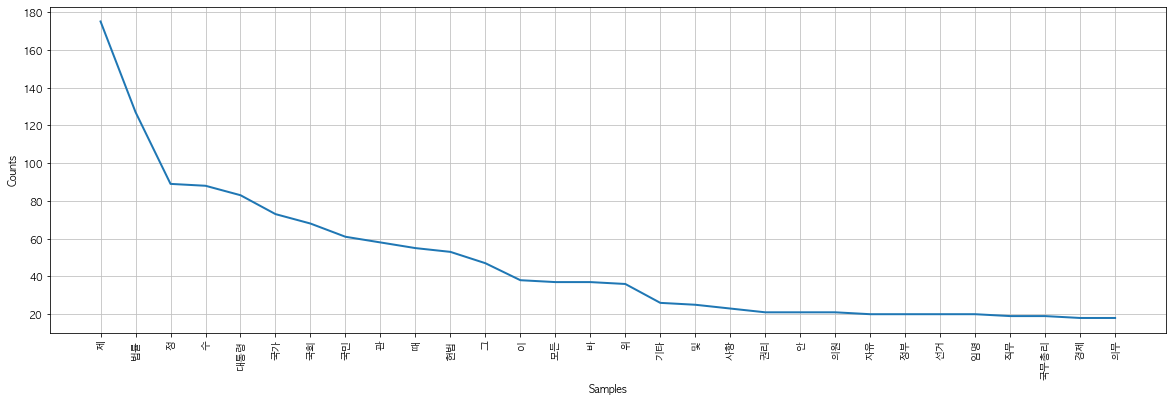

In [28]:
# 단어 출현 빈도

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from nltk import Text

font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleGothic.ttf").get_name()
rc('font', family=font_name)
plt.figure(figsize=(20,6))
kolaw = Text(okt.nouns(c),name="kolaw")
kolaw.plot(30)
plt.show()

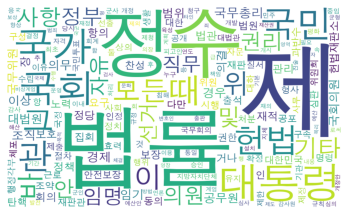

In [29]:
from wordcloud import WordCloud

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"
wc = WordCloud(width=1000, height=600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ian/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


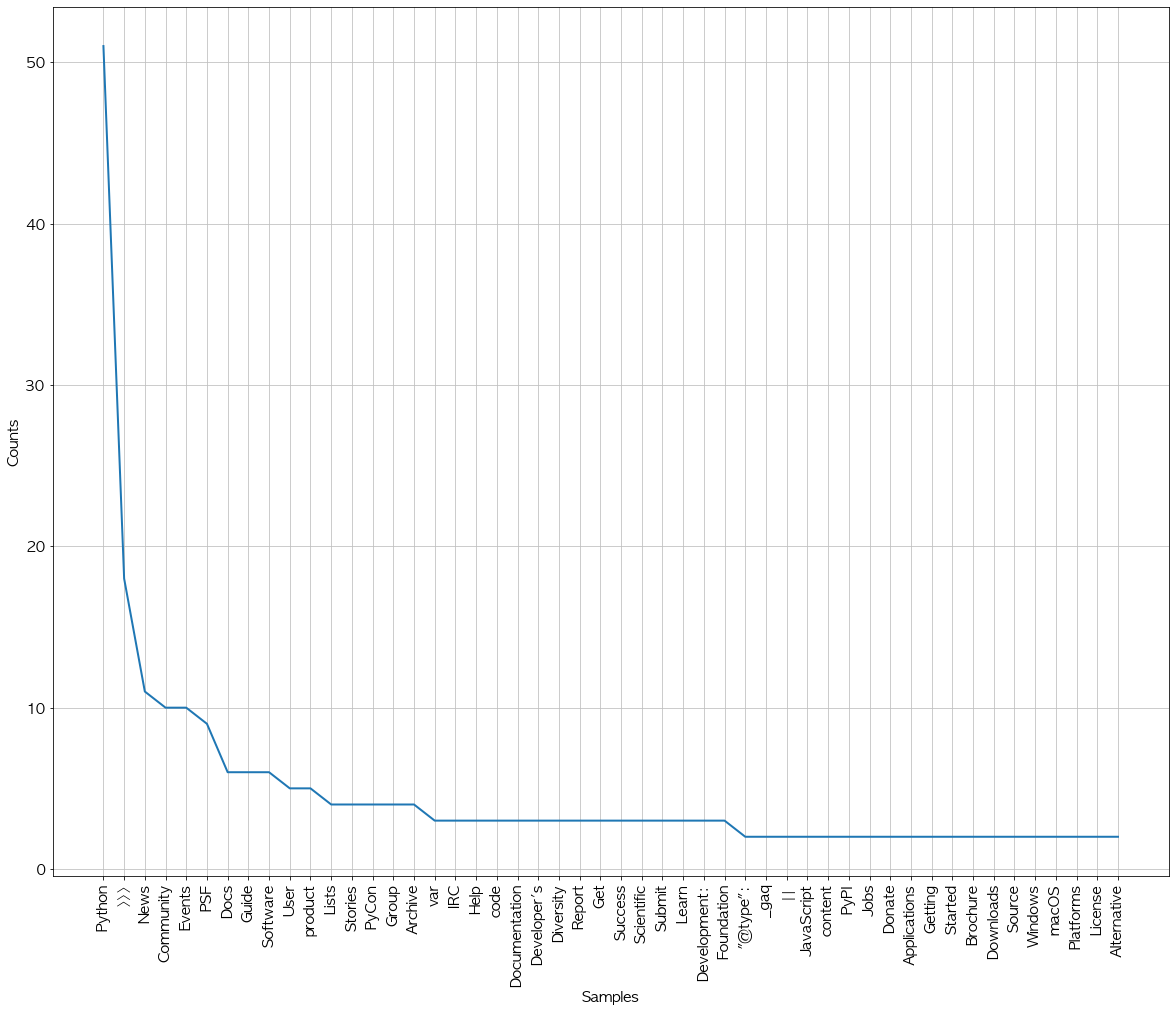

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [32]:
%matplotlib inline
import nltk
nltk.download('averaged_perceptron_tagger')
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(20,16)
plt.rcParams["font.size"]=15

res = urllib.request.urlopen('http://python.org')
html = res.read()
tokens = re.split('\W+',html.decode('utf-8'))

clean = BeautifulSoup(html, 'html.parser').get_text()
tokens = [token for token in clean.split()]

stop = set(stopwords.words('english'))

clean_tokens = [token for token in tokens
if len(token.lower())>1 and (token.lower() not in stop)]

tagged = nltk.pos_tag(clean_tokens)

allnoun = [word for word, pos in tagged if pos in ['NN','NNP']] # 명사, 고유명사만 가져오기

freq_result = nltk.FreqDist(allnoun)
freq_result.plot(50, cumulative=False)